### RLC circuit model

Transient simulation of a simple RLC circuit in a form of a system of ordinary differential equations.
The goal here is to investigate how to integrate the model with Finite Element Method.

In [1]:
# Stub file generated with: PLECS 4.5.8

In [2]:
N = 2 # state variables
M = 1 # output variables

rlc_D_double = zeros(N)
# state vector
rlc_PM0_x = zeros(N)
rlc_PM0_prevX = zeros(N)
# input variable vector?
rlc_PM0_u = zeros(M)
rlc_PM0_prevU = zeros(M)
# output variable vector
rlc_PM0_y = zeros(M)
nothing

In [3]:
using SparseArrays
rlc_PM0_A  = [ 0.989553196031825122 -0.009948507975433002
               0.099485079754330019  0.999501704007258129]
rlc_PM0_B0 = [ 0.004965548048013915; 0.000332053463461062]
rlc_PM0_B1 = [ 0.004982959927419086; 0.000166242529280847]
nothing

In [4]:
function rlc_PM0_update(A, B0, B1, x)
   global rlc_PM0_prevX
   global rlc_PM0_prevU
   global rlc_PM0_u
   x .= A  * rlc_PM0_prevX #=
   =#.+ B0.* rlc_PM0_prevU #=
   =#.+ B1.* rlc_PM0_u
   return nothing
end                

rlc_PM0_update (generic function with 1 method)

In [5]:
# global variables
rlc_first = true;
rlc_sampleTime = 0.00001;

In [6]:
function rlc_initialize(time)
   global rlc_PM0_x
   global rlc_first
    
   rlc_tickHi = time/2^32/rlc_sampleTime |> floor;
   remainder  = time-2^32*rlc_sampleTime * rlc_tickHi;
   
   rlc_tickLo =  remainder / rlc_sampleTime |> ceil;
   remainder -= rlc_tickLo * rlc_sampleTime;
   if abs(remainder) > 1e-6abs(time)
      println("Start time must be an integer multiple of the base sample time.")
   end
    
   # Initialization for Subsystem : 'rlc'
   rlc_PM0_x .= [0.0, 0.0]
   rlc_first = true
   return nothing
end

rlc_initialize (generic function with 1 method)

In [7]:
function rlc_step()
   global rlc_first
   global rlc_PM0_A
   global rlc_PM0_x
   global rlc_PM0_y
   global rlc_PM0_u
   global rlc_PM0_B0
   global rlc_PM0_B1
   
   if rlc_first == true
      rlc_first =  false
   else
      rlc_PM0_prevX .= rlc_PM0_x
      rlc_PM0_update(rlc_PM0_A,
                     rlc_PM0_B0,
                     rlc_PM0_B1,
                     rlc_PM0_x);
   end
   # electrical output?
   rlc_PM0_y[1] = 1.0 * rlc_PM0_x[1];
   rlc_PM0_prevU .= rlc_PM0_u
end

rlc_step (generic function with 1 method)

In [8]:
rlc_terminate() = return nothing

rlc_terminate (generic function with 1 method)

In [9]:
using Printf

T = 2000
u = zeros(T)
y = zeros(T)
t = range(0, stop=T-1) * rlc_sampleTime

rlc_initialize(first(t))
println("    u     y     ")
println("================")
for i=1:T
    rlc_PM0_u[1] = exp(-1e6(t[i]-0.005)^2)
    
    rlc_step()
    u[i] = rlc_PM0_u[1]
    y[i] = rlc_PM0_y[1]
    @printf("%+07.3g %+07.3g\n", u[i], y[i])
end
rlc_terminate()

    u     y     
+1.39e-11 +000000
+1.53e-11 +1.45e-13
+1.7e-11 +3.05e-13
+1.87e-11 +4.79e-13
+2.07e-11 +6.69e-13
+2.28e-11 +8.77e-13
+2.52e-11 +1.11e-12
+2.78e-11 +1.35e-12
+3.07e-11 +1.63e-12
+3.39e-11 +1.93e-12
+3.74e-11 +2.25e-12
+4.12e-11 +2.61e-12
+4.55e-11 +03e-12
+5.01e-11 +3.43e-12
+5.52e-11 +3.9e-12
+6.09e-11 +4.42e-12
+6.7e-11 +4.98e-12
+7.39e-11 +5.6e-12
+8.13e-11 +6.28e-12
+8.96e-11 +7.02e-12
+9.86e-11 +7.84e-12
+1.09e-10 +8.73e-12
+1.19e-10 +9.71e-12
+1.31e-10 +1.08e-11
+1.45e-10 +1.2e-11
+1.59e-10 +1.32e-11
+1.75e-10 +1.47e-11
+1.92e-10 +1.62e-11
+2.11e-10 +1.79e-11
+2.32e-10 +1.98e-11
+2.55e-10 +2.18e-11
+2.8e-10 +2.41e-11
+3.08e-10 +2.65e-11
+3.38e-10 +2.92e-11
+3.71e-10 +3.22e-11
+4.07e-10 +3.54e-11
+4.46e-10 +3.89e-11
+4.9e-10 +4.28e-11
+5.37e-10 +4.71e-11
+5.89e-10 +5.17e-11
+6.46e-10 +5.68e-11
+7.08e-10 +6.24e-11
+7.76e-10 +6.85e-11
+8.51e-10 +7.52e-11
+9.32e-10 +8.26e-11
+1.02e-09 +9.06e-11
+1.12e-09 +9.94e-11
+1.22e-09 +1.09e-10
+1.34e-09 +1.19e-10
+1.47e-09 +1.3

+00.561 -00.138
+00.553 -00.139
+00.544 -00.141
+00.536 -00.143
+00.527 -00.145
+00.519 -00.146
+000.51 -00.148
+00.502 -00.149
+00.494 -000.15
+00.486 -00.151
+00.477 -00.153
+00.469 -00.154
+00.461 -00.155
+00.453 -00.156
+00.445 -00.156
+00.437 -00.157
+00.429 -00.158
+00.421 -00.158
+00.413 -00.159
+00.406 -00.159
+00.398 -000.16
+000.39 -000.16
+00.383 -000.16
+00.375 -000.16
+00.368 -000.16
+00.361 -000.16
+00.353 -000.16
+00.346 -00.159
+00.339 -00.159
+00.332 -00.159
+00.325 -00.158
+00.318 -00.157
+00.311 -00.157
+00.305 -00.156
+00.298 -00.155
+00.292 -00.154
+00.285 -00.153
+00.279 -00.152
+00.273 -00.151
+00.266 -00.149
+000.26 -00.148
+00.254 -00.147
+00.248 -00.145
+00.243 -00.144
+00.237 -00.142
+00.231 -000.14
+00.226 -00.139
+000.22 -00.137
+00.215 -00.135
+000.21 -00.133
+00.204 -00.131
+00.199 -00.129
+00.194 -00.127
+00.189 -00.124
+00.185 -00.122
+000.18 -000.12
+00.175 -00.118
+00.171 -00.115
+00.166 -00.113
+00.162 -000.11
+00.157 -00.108
+00.153 -00.105
+00.149 

+2.66e-19 +0.00369
+2.33e-19 +0.00351
+2.05e-19 +0.00333
+1.79e-19 +0.00315
+1.57e-19 +0.00296
+1.38e-19 +0.00277
+1.21e-19 +0.00259
+1.06e-19 +0.0024
+9.27e-20 +0.00221
+8.12e-20 +0.00202
+7.11e-20 +0.00183
+6.23e-20 +0.00165
+5.45e-20 +0.00146
+4.77e-20 +0.00127
+4.18e-20 +0.00108
+3.65e-20 +0.000895
+3.2e-20 +0.00071
+2.79e-20 +0.000525
+2.44e-20 +0.000342
+2.14e-20 +0.00016
+1.87e-20 -1.96e-05
+1.63e-20 -0.000198
+1.42e-20 -0.000374
+1.24e-20 -0.000548
+1.09e-20 -0.00072
+9.49e-21 -0.00089
+8.28e-21 -0.00106
+7.23e-21 -0.00122
+6.31e-21 -0.00138
+5.5e-21 -0.00154
+4.8e-21 -0.0017
+4.19e-21 -0.00185
+3.65e-21 -00.002
+3.18e-21 -0.00214
+2.77e-21 -0.00228
+2.42e-21 -0.00242
+2.1e-21 -0.00255
+1.83e-21 -0.00269
+1.6e-21 -0.00281
+1.39e-21 -0.00293
+1.21e-21 -0.00305
+1.05e-21 -0.00317
+9.16e-22 -0.00328
+7.97e-22 -0.00338
+6.93e-22 -0.00348
+6.03e-22 -0.00358
+5.24e-22 -0.00367
+4.56e-22 -0.00376
+3.96e-22 -0.00384
+3.44e-22 -0.00392
+2.99e-22 -0.00399
+2.6e-22 -0.00406
+2.26e-22 -0.0

+1.31e-61 +9.79e-05
+1.04e-61 +0.000111
+8.17e-62 +0.000124
+6.45e-62 +0.000136
+5.08e-62 +0.000149
+4.01e-62 +0.000161
+3.16e-62 +0.000172
+2.49e-62 +0.000184
+1.96e-62 +0.000195
+1.55e-62 +0.000206
+1.22e-62 +0.000216
+9.59e-63 +0.000227
+7.55e-63 +0.000237
+5.94e-63 +0.000246
+4.68e-63 +0.000255
+3.68e-63 +0.000264
+2.89e-63 +0.000273
+2.28e-63 +0.000281
+1.79e-63 +0.000289
+1.41e-63 +0.000296
+1.11e-63 +0.000303
+8.7e-64 +0.00031
+6.83e-64 +0.000316
+5.37e-64 +0.000322
+4.22e-64 +0.000328
+3.31e-64 +0.000333
+2.6e-64 +0.000338
+2.04e-64 +0.000342
+1.6e-64 +0.000346
+1.26e-64 +0.00035
+9.86e-65 +0.000353
+7.73e-65 +0.000356
+6.06e-65 +0.000359
+4.75e-65 +0.000361
+3.73e-65 +0.000363
+2.92e-65 +0.000364
+2.29e-65 +0.000365
+1.79e-65 +0.000366
+1.4e-65 +0.000366
+1.1e-65 +0.000366
+8.61e-66 +0.000365
+6.74e-66 +0.000364
+5.28e-66 +0.000363
+4.13e-66 +0.000362
+3.23e-66 +0.00036
+2.53e-66 +0.000357
+1.98e-66 +0.000355
+1.54e-66 +0.000352
+1.21e-66 +0.000349
+9.43e-67 +0.000345
+7.37e-6

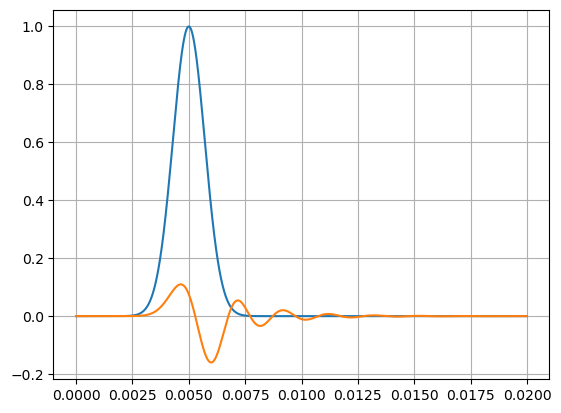

In [10]:
using PyPlot
plot(t, u, t, y)
grid()

In [11]:
last(t)

0.01999